For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



## Answer:

<span style="color:green">The dataset used for analysis is Titanic.csv</span>
The question answered in the report are:
- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age

## Importing the dataset and checking missing values

In [1]:
### Importing the required libraries

import pandas as pd  # Pandas is python library used for data analysis and manipulation
import numpy as np   #Numpy is python library for is used to work with arrays and high-level mathematical functions

In [2]:
### importing the dataset in jupyter Notebook

df = pd.read_csv(r"C:\Users\ASUS\Documents\TERM-1 (PDD)\CSPC_4800\Assignment 3\titanic.csv",encoding = "utf-8")
print(df)  #printing the DataFrame (df)
df.columns #displays all the columns of the dataframe

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df = df.set_index(['PassengerId'])  #setting the index of of first column as passengerId instead of default index
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
### check for missing values for columns that will be used for analysis

def Missing_Values(col):  #The function returns sum of Null/NaN values for a specified column
    mv=col.isnull().sum() 
    return mv

In [12]:
Missing_Values(df['Survived']) # missing values 0, the result will be reliable

0

In [13]:
Missing_Values(df['Pclass'])  # missing values 0, the result will be reliable

0

In [14]:
Missing_Values(df['Sex'])   # missing values 0, the result will be reliable

0

In [15]:
Missing_Values(df['Age'])  # missing values 177. 19% of the total for the column age is missing therefore, the result might not
                           # be 100% reliable. 

177

## Handling Missing values

### there are various methods one can use to handle missing values:
- Drop the missing values (If it doesn't affect the analysis)
- Replace the missing values y mean (Not a very good approach)
- Replace the missing values by median (A better approach)
- Replace the missing values by median depending upon the situation and taking in consideration other factors. 

In [23]:
dfA = df[['Age' , 'Survived']].dropna(how='any')
dfA['Age'] = (np.floor(dfA['Age'])).astype(int)
dfA.shape

# We are dropping the missing values because it won't affect our analysis as we are taking in consideration other columns as
# well. 

(714, 2)

## Exploring the Titanic dataset

In [19]:
df.describe()

'''From this it is evident that most of the people bought their tickets at a cheaper fare. Mean age of people travelling is 
29-30. The maximum fare value 512.33 indicated that people have bougth expensive tickets this indicates possible VIPs and rich
people. 
'''

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

''' info() helps to figure out the datatypes and the existence of the missing values. We can interpret from the data that Age,
Cabin and Embarked have few missing values.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analyzing the data

In [4]:
Survivors = df['Survived'].sum()

#there are 2 parameters data and f (data is the dataFrame and f are the columns for which we want to find the survival rate)
def SurvivalRate(data, f):
    bf = data.groupby(f)
    cbf = bf['Survived'].sum()
    sr = cbf / Survivors * 100
    print('Survival Rate is: ', round(sr))
    print('Count is ', round(cbf))

### Q1: Determine if the survival rate is associated to the class of passenger

''' The variable 'Pclass' represents the class of passengers and it is divided into 3 bins 1,2 and 3 '''

In [27]:
TotalPass = len(df['Pclass'])
one = (df['Pclass'] == 1).sum()
two = (df['Pclass'] == 2).sum()
three = (df['Pclass'] == 3).sum()

first =  one / TotalPass * 100
second = two / TotalPass * 100
third = three / TotalPass * 100
print('Percentage of passengers in class one: ', '{0:.3g}'.format(first), ' and number of passengers in first class: ', one)
print('Percentage of passengers in class two: ', '{0:.3g}'.format(second), ' and number of passengers in second class: ', two)
print('Percentage of passengers in class three: ', '{0:.3g}'.format(third), ' and number of passengers in third class: ', three)

Percentage of passengers in class one:  24.2  and number of passengers in first class:  216
Percentage of passengers in class two:  20.7  and number of passengers in second class:  184
Percentage of passengers in class three:  55.1  and number of passengers in third class:  491


From the above analysis we can say that there are approximatly 24% passengers on board in first class, 20% passengers on board in second class and 55% passengers onboard in third class. Third class have maximum number of passengers. 

In [22]:
SurvivalRate(df,'Pclass')

Survival Rate is:  Pclass
1    40.0
2    25.0
3    35.0
Name: Survived, dtype: float64
Count is  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


From the above results it is very evident that out of 24% passengers on board in the first class only 40% were able to survive. The passengers on board in second class were 20% and from those only 25% were able to survive the tragedy. Whereas third class had maximum number of passengers i.e. 55% (491 total) and only 35% (119) of passengers survived. 

Conclusion: Out of 891 only 342 passengers onboard survived

#### Now as we have the total number of passengers in each class (First, Second and Third) and also we have the number of survivors
#### We can now find the number of people who died

In [5]:
import matplotlib.pyplot as plt  #Matplotlib is graph plotting/ visualization library
import seaborn as sns            #High-level visualization library based on matplotlib

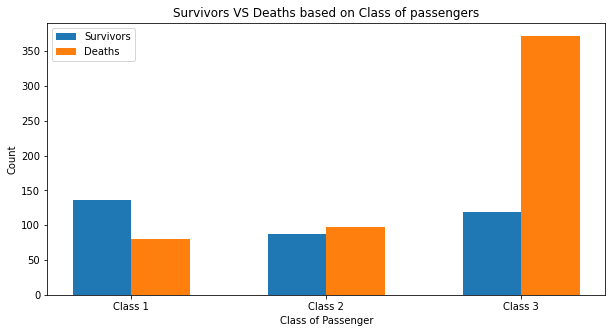

In [36]:
# Numbers of pairs of bars 
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (136, 87, 119)
# Specify the values of orange bars (height)
orange_bar = (80, 97, 372)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Survivors')
plt.bar(ind + width, orange_bar, width, label='Deaths')

plt.xlabel('Class of Passenger')
plt.ylabel('Count')
plt.title('Survivors VS Deaths based on Class of passengers')

plt.xticks(ind + width / 2, ('Class 1', 'Class 2', 'Class 3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Q2: Determine if the survival rate is associated to the gender

In [17]:
def Totals(data, column, attribute, stat):
    out = data[column].where(data[column] == attribute)
    sum1 = out.where(data['Survived'] == stat).count()
    return sum1

'''The above function have 4 parameters Data is the DataFrame, Column is the column name (e.g. Age, Survived, etc.) Attribute
is if the person is Male/Female and Stat is a boolean value i.e. a person survived or died. The function first stores the value
of the column Gender where the Attribute is either male or female and it then checks if the person survived or died'''

In [18]:
print("***NUMBER OF SURVIVALS BASED ON GENDER***")
FSurvival = Totals(df, 'Sex', 'female', 1)
print("Number of females survived: ", FSurvival)

MSurvival = Totals(df, 'Sex', 'male', 1)
print("Number of males survived: ", MSurvival)

print("***NUMBER OF DEATHS BASED ON GENDER***")
FDied = Totals(df, 'Sex', 'female', 0)
print("Number of females died: ", FDied)

MDied = Totals(df, 'Sex', 'male', 0)
print("Number of males died: ", MDied)

***NUMBER OF SURVIVALS BASED ON GENDER***
Number of females survived:  233
Number of males survived:  109
***NUMBER OF DEATHS BASED ON GENDER***
Number of females died:  81
Number of males died:  468


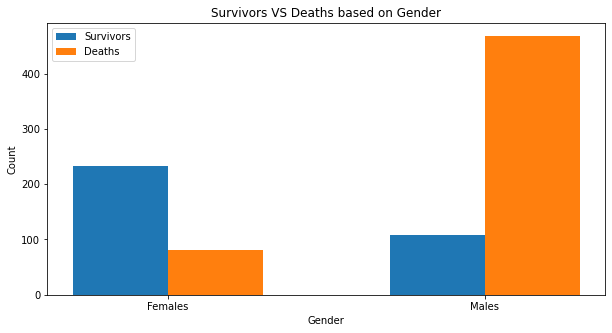

In [6]:
# Numbers of pairs of bars 
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (233,109)
# Specify the values of orange bars (height)
orange_bar = (81,468)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Survivors')
plt.bar(ind + width, orange_bar, width, label='Deaths')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survivors VS Deaths based on Gender')

plt.xticks(ind + width / 2, ('Females', 'Males'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Q3: Determine the survival rate is associated to the age

I will analyze the results of survival inassociation with age by dividing them into categories of (Childeren and adults). Where childeren being of the age <= 18 and adults being over the age of 18.

In [28]:
AgeList = dfA['Age'].unique()
AgeList.sort()
AgeList

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [42]:
AgeSurvival = pd.DataFrame(index=AgeList, columns=['Survived', 'Died', 'Total', 'Percentage'])

AgeSurvival['Survived'] = dfA.groupby('Age')['Survived'].sum()
AgeSurvival['Total'] = dfA.groupby('Age').count()
AgeSurvival['Died'] = AgeSurvival['Total'] - AgeSurvival['Survived']
AgeSurvival['Percentage'] = round(dfA.groupby('Age')['Survived'].mean() * 100, 2)

print(AgeSurvival)
AgeSurvival.head()

    Survived  Died  Total  Percentage
0          7     0      7      100.00
1          5     2      7       71.43
2          3     7     10       30.00
3          5     1      6       83.33
4          7     3     10       70.00
..       ...   ...    ...         ...
66         0     1      1        0.00
70         0     3      3        0.00
71         0     2      2        0.00
74         0     1      1        0.00
80         1     0      1      100.00

[71 rows x 4 columns]


,Survived,Died,Total,Percentage
0,7,0,7,100.00
1,5,2,7,71.43
2,3,7,10,30.00
3,5,1,6,83.33
4,7,3,10,70.00


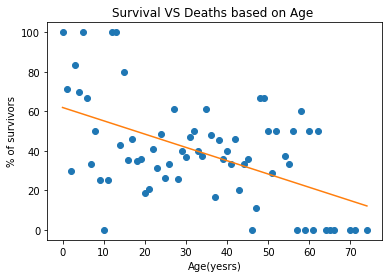

In [41]:
AgeSurvival = AgeSurvival.drop(AgeSurvival[(AgeSurvival['Percentage'] == 100) & (AgeSurvival.index > 50)].index)
XAxis = AgeSurvival['Percentage'].index
YAxis = AgeSurvival['Percentage']
plt.scatter(XAxis, YAxis)
m, b = np.polyfit(XAxis, YAxis, 1)
plt.plot(XAxis, YAxis, '.')
plt.plot(XAxis, m*XAxis + b, '-')
plt.title('Survival VS Deaths based on Age ')
plt.xlabel('Age(yesrs)')
plt.ylabel('% of survivors')
plt.show()

## Conclusion

After analyzing the Titanic.csv it can be clearly said that Women have a higher chance of survival than men. Moreover First class passengers have a much higher chance to survive than the second class  or third class passengers. Also, when the analysis was done taking in consideration the Age of the passenger, the relationship between age and percentage of survivors is negative. That is, if the age is less the chances of survival is more whereas, if the age of the passenger is more the chances of survival decreases. 

By this conclusion, the results of Titanic movie totally makes sense. "Rose", the female passenger on board in first class and of yound age survived the accident whereas "Jack", a male passenger on board in third class with more age than Rose died. 

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 